In [1]:
# multiple outputs from a single chunk
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# data retrieval
covid_sequence_positions = pd.read_csv('/home/oreodog/Desktop/Files/projects/covid/part1/PositionsInfo.csv')
bees = pd.read_csv('/home/oreodog/Desktop/Files/projects/bees/bees.csv')

In [12]:
# the following code was used on my covid fasta file to create the csv
# that is assigned to "covid_sequence_positions":

# with open('/home/oreodog/Desktop/Files/projects/covid/part1/CovidSeqData/CovidSeqAligned.fasta', 'r') as f_input, \
# open('/home/oreodog/Desktop/Files/projects/covid/part1/CovidSeqData/positions', 'w') as f_output:
#    # create dictionary containing data for each position
#    positions = {}
#    for line in f_input:
#        if line[0] != '>':
#            for i in range(len(line)-1):
#                if i+1 not in positions:
#                    positions[i+1] = line[i]
#                else:
#                    positions[i+1] += line[i]  
#    # write dictionary data as an output
#    f_output.write('position\tnucleotides\tn_unique\n')
#    for i in positions:
#        f_output.write(str(i)+'\t'+positions[i]+'\t'+str(len(set(positions[i])))+'\n')

# the code goes through each covid sequence, and creates a dictionary key for
# each position, and assigns the nucleotide found on each sequence as its value

I mainly will explore and perform EDA on my "bees" dataset from project 2, but I also decided to transform covid data from project 1 with the above script, inorder to look at the sequencing data in a different way.

In [10]:
# view the data
covid_sequence_positions.head()
covid_sequence_positions.info()

bees.head()
bees.info()

,position,nucleotides,n_unique
0,1,AA------AAA-------A-----A--------------A-,2
1,2,TT------TTT-------T-----T--------------T-,2
2,3,TT------TTT---T---T-----T--T-----------T-,2
3,4,AA------AAA---A---A-----AA-A-----------A-,2
4,5,AA------AAA---A---A--A--AA-A---A-------AA,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29903 entries, 0 to 29902
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   position     29903 non-null  int64 
 1   nucleotides  29903 non-null  object
 2   n_unique     29903 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 701.0+ KB


,Unnamed: 0,day,hive,flow,humidity,temperature,weight
0,1,1,schwartau,-0.004274,98.040310,15.477829,50.736790
1,2,1,wurzburg,-0.002849,92.047308,-0.092518,52.661068
2,3,2,schwartau,-0.007639,98.806319,13.376389,50.657796
3,4,2,wurzburg,-0.001995,92.794722,1.825578,52.669994
4,5,3,schwartau,-0.010417,98.403472,16.181965,50.769786


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1751 non-null   int64  
 1   day          1751 non-null   int64  
 2   hive         1751 non-null   object 
 3   flow         1598 non-null   float64
 4   humidity     1598 non-null   float64
 5   temperature  1598 non-null   float64
 6   weight       1598 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 95.9+ KB


The covid data was transformed in a way to highlight which positions in the covid sequences are more variable than others. This is achieved by taking the set length of the "nucleotides" string in order to create "n_unique". There 29903 rows of data which correspond to the 29903 bp length of my covid sequences.

The bees data was transformed in project 2 to make each row (observation) correspond to the daily average. So there are a total of 1751 days of data collected. There are however only 1598 observations of "flow" "humidity" "temperature" and "weight" due to a gap in hive "wurzburg" data compared to the "schwartau" hive.

,Unnamed: 0,day,flow,humidity,temperature,weight
count,1751.000000,1751.000000,1598.000000,1598.000000,1598.000000,1598.000000
mean,876.000000,438.267276,0.635550,80.421474,19.867713,55.385655
std,505.614478,252.837044,3.678392,21.091475,10.877966,13.934764
min,1.000000,1.000000,-5.787899,-100.000000,-5.454276,-0.169770
25%,438.500000,219.500000,-0.173111,72.153505,10.143749,50.301814
50%,876.000000,438.000000,-0.007535,85.004653,20.642248,54.241265
75%,1313.500000,657.000000,0.000000,92.356163,29.755560,64.275042
max,1751.000000,881.000000,36.105903,100.000000,35.373833,91.227269


schwartau    881
wurzburg     870
Name: hive, dtype: int64

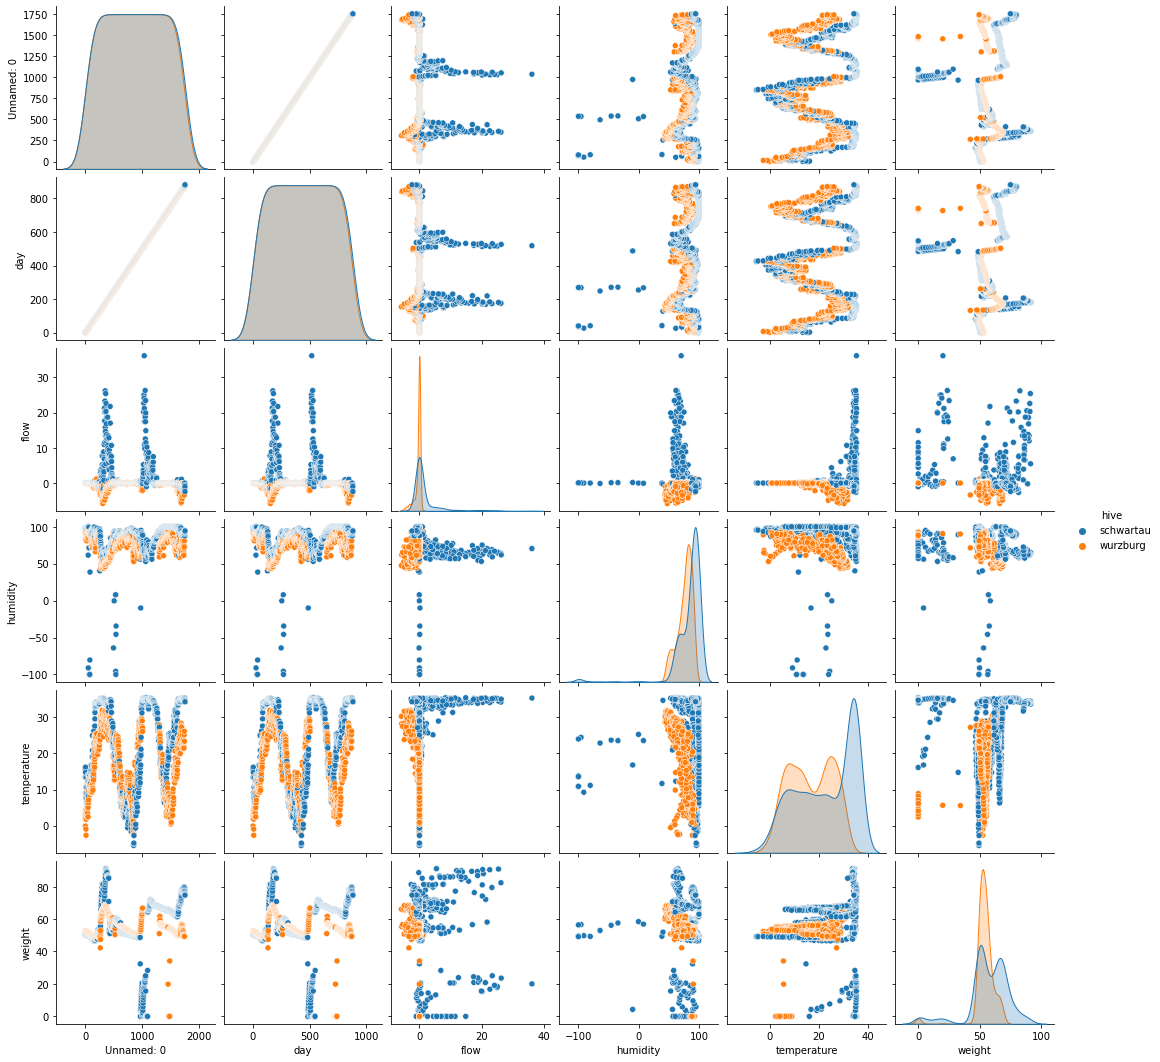

In [29]:
# Exploratory Data Analysis
bees.describe()
bees['hive'].value_counts()
sns.pairplot(data=bees, hue='hive')

An EDA was performed for the "bees" dataset. The mean flow, humidity, temperature, and weight, in additional to several other test statistics for each numeric variable are shown in the table above.

These variables were mapped in a pairwise fashion against each other, which is colored according to the two different hives in the dataset. Interestingly all the numeric variables for either hive, apart from "flow", follow a similar pattern. This relates back to how the data was collected simultaneously for both hives, with the only difference being hive location. Thus the pairwise graphs show temporal similarities.

Hive "flow", that is the number of bees entering - exiting the hive function almost in complete opposite when comparing the two hives; this is best seen in the flow vs. day graph [2,1]. It would seem that, regardless in similarities to environmental condititions, bee flow remains significantly different between the two hives.